In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
meta = pd.read_csv("series-networks/meta.csv")
edgelist = pd.read_csv("series-networks/sopranos/edges.csv")
attr = pd.read_csv("series-networks/sopranos/attributes.csv")

Cleaning

In [3]:
attr["gender"].unique()
attr[attr["name"].isna()]["id"].to_list()

attr[attr["gender"].isna()]

,id,name,aliases,nationality,home,gender,hair,eye,status,partner,...,title(s),date_of_birth,date_of_death,membership,leader,members,associates,businesses,fronts,criminal_activity
39,Augustus_Aprile,Augustus Aprile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Baccalieri_Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Barese_Soldier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Characters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,Four_Unnamed_Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,Jackie_Jr%27s_Crew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Membership,Jackie Aprile Jr.,Dino ZerilliCarlo Renzi,Matush Giamona,Businesses,Jackie Jr's Fraternity,"Drug Dealing, Robbery, Murder, Hijacking, Assa..."
246,Janice_Soprano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,Larry%E2%80%99s_Contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,Max_Pellegrino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,Parisi_family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
non_characters = [
    "Baccalieri_Family",
    "Characters",
    "Four_Unnamed_Men",
    "Jackie_Jr%27s_Crew",
    "Larry%E2%80%99s_Contact",
    "Parisi_family",
    "Pictured_Barese_Soldiers",
    "Social_Club_Bartender",
]

# Characters with missing gender
f_miss_gender = ["Janice_Soprano", "Perrilyn"]
m_miss_gender = ["Max_Pellegrino", "Paulie_Gualtieri", "Rene_LeCours",]

In [5]:
attr["gender"] = attr["gender"].replace("Males", "Male")

attr.loc[attr["id"].isin(f_miss_gender), "gender"] = "Female"
attr.loc[attr["id"].isin(m_miss_gender), "gender"] = "Male"

# Drop non-characters
attr.drop(attr[attr["id"].isin(non_characters)].index, inplace=True)
non_char_index = edgelist[edgelist["from"].isin(non_characters)].index.union(
    edgelist[edgelist["to"].isin(non_characters)].index
)

edgelist.drop(non_char_index, inplace=True)

Valami cleaning kell még?

Partner - wife baszakszás

(Van olyan aki wife és sidechick is?)

Hogyan csináljam:
- wife és sidechick változó fixen kell
- Husband?
- arra változó, hogy kinek a wife-a sidechick-je ?

In [6]:
attr["partner"].unique()

array(['Janice Soprano (ex-girlfriend)', 'Christopher Moltisanti(fiancé)',
       nan, 'His lover',
       'Alex Mahaffey (former lover)Christopher Moltisanti (fling)',
       'Gregory Moltisanti (fiancé)',
       'Rhiannon Flammer (girlfriend)Blanca Selgado (ex-girlfriend)Devin Pillsbury (ex-fling)',
       'Russ (lover)', 'Martina (former comare)',
       'Adriana La Cerva (former fiancée)', 'Stanley Johnson',
       'Vin Makazian (Lover)', 'Giuseppina Moltisanti (comare)', 'Rosie',
       'Jerome (boyfriend)', 'Bernice (mistress)',
       'Meadow Soprano (former fianceé)',
       'Johnny Boy Soprano (former lover)', 'Unnamed Comare',
       'Dickie Moltisanti (lover, formerly)Harold McBrayer (lover)',
       'Tony Soprano (paramour)Barry (Ex-boyfriend)Multiple past paramours',
       'Amy Safir (fianceé)', 'Tony Blundetto (lover)',
       '☨ Giuseppina Moltisanti (mistress)',
       'Rhiannon Flammer (ex-girlfriend)', 'Renata (girlfriend)',
       'Tony Soprano (Former lover)Ronald 

Mik utalnak side-chickségre:
- Mistress / ex-mistress
- goomar
- comare
- paramour -> faszira utal
- fling ? -> ez nem az (van, hogy a fling is az)
- lover? -> ezt egyelőre hagyjuk

Nevek / között nincs valaki csak mistressként megjelölve? -> nincs (csekkoltam)

Find mistress and add mistress variable

In [7]:
mistress_keyword = ["mistress", "goomar", "comare"]

In [8]:
def find_chars_with_mistress(df: pd.DataFrame):
    chars_with_mistress = pd.DataFrame(columns=df.columns)

    for i, row in df.iterrows():
        if isinstance(row["partner"], float):
            continue

        for kw in mistress_keyword:
            if row["partner"].lower().find(kw) != -1:
                #chars_with_mistress = chars_with_mistress.append(row)
                chars_with_mistress.loc[len(chars_with_mistress.index)] = row

    return chars_with_mistress

In [9]:
chars_with_mistress = find_chars_with_mistress(attr)
chars_with_mistress["partner"].unique()
# chars_with_mistress
# attr[attr["partner"] == "Yaryna Kastropovich (goomar; deceased)"]

# Ezt még egyszer megnézni, hogy minden jó-e
mistresses = [
    "Martina",
    "Giuseppina_Moltisanti",
    "Bernice",
    "Fran_Felstein",
    "Yaryna_Kastropovich",
    "Tracee",
    "Gwen_MacIntyre",
    "Charmaine_Bucco",
    "Irina_Peltsin",
    "Gloria_Trillo",
    "Valentina_La_Paz",
    "Svetlana_Kirilenko",
    "Jill DiBlasio",
    "Julianna_Skiff" # Ezt később találtam csak, karakter leírás alapján passzol
]
len(mistresses)

14

In [10]:
# Bernice és Jill DiBlasio nem lett meg a nevek közül, de ők fandomon sem voltak fent
# 11 mistress

for i, row in attr.iterrows():
    if row["id"] in mistresses:
        attr.loc[i, "wife_or_mistress"] = "mistress"
    else:
        attr.loc[i, "wife_or_mistress"] = np.nan

C:\Users\aronn\AppData\Local\Temp\ipykernel_17652\2068810409.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mistress' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attr.loc[i, "wife_or_mistress"] = "mistress"


Find wife / fiancé from spouse variable

! vannak olyanok, akiknek van husbandje, de csak a neve van a spouse változóban

In [11]:
#attr[attr["gender"] == "Female"]["spouse"].unique()

In [12]:
for i, row in attr.iterrows():
    if isinstance(row["spouse"], float):
        continue

    if row["spouse"].lower().find("husband") != -1:
        attr.loc[i, "wife_or_mistress"] = "wife_or_fiancé"
    elif row["spouse"].lower().find("fiancé") != -1:
        attr.loc[i, "wife_or_mistress"] = "wife_or_fiancé"
    else:
        attr.loc[i, "wife_or_mistress"] = np.nan

#attr[attr["wife_or_mistress"] == "wife"][["id", "spouse"]]

Find other relation to faszik

Itt ezt úgy kell megcsinálni, hogy ne írjam felül a mistress és wife értékeket (Tonynál több mistress is fling-ként van benne)

Egyelőre úgy csinálnám, hogy végigmegyek a nőkön és nézem a partner stringjüket.
Ha ott lover van benne -> berakom a lover kategóriába

PROBLÉMA(?): mi van ha bizonyos esetekben csak a faszinál van benne, a kapcsolat a partner változóban (pl. Janice Sopranonál biztos ez van -> look at első érték partner unique-nál)
- ezen lehet egyelőre nem kéne aggódni

Amilyen kategóriát csak faszi oldalról lehet elérni, pl fiancé néha, azokat ugyanúgy megcsinálni, mint a mistresseket (nem kell mindig stringekkel baszakodni)

Csajszi kategóriák:
- lover
- girlfriend (vagyis pont a boyfriend kell)
- fiancé -> ez okoz bajt a wife-al?
- fling
- Separated ?


Talán a gyerekeket ki lehetne venni valahogy?

In [13]:
attr["spouse"].unique()
attr[attr["partner"] == 'Jason EvaninaTony Soprano (past fling)Paulie Gualtieri (past fling)Silvio Dante (past fling)']

attr[(attr["gender"] == "Female") &
     (attr["wife_or_mistress"].isna())]["spouse"].unique()

attr[attr["gender"] == "Female"]["partner"].unique()

attr[(attr["gender"] == "Female") &
     #(attr["wife_or_mistress"].isna()) &
     (attr["partner"].notna())]

attr[(attr["gender"] == "Female") &
     (attr["wife_or_mistress"].isna())]

,id,name,aliases,nationality,home,gender,hair,eye,status,partner,...,date_of_birth,date_of_death,membership,leader,members,associates,businesses,fronts,criminal_activity,wife_or_mistress
1,Adriana_La_Cerva,Adriana La Cerva,NaN,Italian-American,"Apartment, New Jersey, United States",Female,Blonde,Brown,Deceased,Christopher Moltisanti(fiancé),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agent_Malatesta,Agent Malatesta,NaN,Italian-American,NaN,Female,Brown,Brown,Alive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Aida_Melfi,Aida Melfi,NaN,Italian-American,NaN,Female,Grey,Brown,Alive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Alex_Mahaffey%27s_Lover,Alex Mahaffey's Lover,Booboo in pink,American,New Jersey,Female,Chestnut blonde,NaN,Alive,Alex Mahaffey (former lover)Christopher Moltis...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Alexandra_Lupertazzi,Alexandra Lupertazzi,NaN,Italian-American,"New York City, New York",Female,Dark brown,Brown,Alive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Tara_Zincone,Tara Zincone,NaN,Italian-American,New Jersey,Female,Dark Brown,Hazel,Alive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,Terri_Bonpensiero,Terri Bonpensiero,NaN,Italian-American,NaN,Female,NaN,NaN,Alive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,Tina_Francesco,Tina Francesco,NaN,Spanish-American,NaN,Female,Brown,Brown,Alive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,Virginia_Lupo,Virginia Lupo,NaN,Italian-American,NaN,Female,Auburn,Hazel,Alive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Nagyon kevés olyan nő van, akinél ürés a wife_or_mistress változó és van a spouse vagy a partner változójában valami
wife_or_fiancé = ["Adriana_La_Cerva", "Amy_Safir", "Jen_Fazio"]
lovers = ["Alex_Mahaffey%27s_Lover"]
girlfriend = ["Renata", "Rosie"]

attr.loc[attr["id"].isin(wife_or_fiancé), "wife_or_mistress"] = "wife_or_fiancé"

In [15]:
"""for i, row in attr[attr["gender"] == "Female"].iterrows():
    # Skip rows where wife_or_mistress is not na
    if isinstance(row["wife_or_mistress"], str):
        continue
    
    # Skip rows with nan partner
    if isinstance(row["partner"], float):
        continue

    print(row)"""

'for i, row in attr[attr["gender"] == "Female"].iterrows():\n    # Skip rows where wife_or_mistress is not na\n    if isinstance(row["wife_or_mistress"], str):\n        continue\n    \n    # Skip rows with nan partner\n    if isinstance(row["partner"], float):\n        continue\n\n    print(row)'

Centrality measure

In [16]:
G = nx.from_pandas_edgelist(edgelist, "from", "to", create_using=nx.DiGraph)
eigen_cent = pd.Series(nx.eigenvector_centrality(G))
attr["eigen_cent"] = attr["id"].map(eigen_cent)

In [17]:
# 26% nő
len(attr[attr["gender"] == "Female"]) / len(attr)



"""pd.set_option('display.max_rows', None)
attr[(attr["gender"] == "Female") &
    (attr["wife_or_mistress"].isna())]"""
# nők 59%-a nem wife vagy mistress -> itt még vannak girlfriendek bőven (kód feljebb megjeleníti az egészet)
len(attr[(attr["gender"] == "Female") &
    (attr["wife_or_mistress"].isna())]) / len(attr[attr["gender"] == "Female"])

0.5882352941176471

In [18]:
attr.loc[
    (attr["gender"] == "Female") & (attr["wife_or_mistress"].isna()), "wife_or_mistress"
] = "Other"

len(attr[attr["wife_or_mistress"] == "Other"]) / len(attr[attr["gender"] == "Female"])


0.5882352941176471

Plot

In [19]:
plot_data = pd.concat([attr.groupby("gender")["eigen_cent"].mean(),
                       attr.groupby("wife_or_mistress")["eigen_cent"].mean()]).reset_index()

order = [1, 0, 4, 3, 2]
plot_data = plot_data.reindex(order)
plot_data

,index,eigen_cent
1,Male,0.028770
0,Female,0.025929
4,wife_or_fiancé,0.035936
3,mistress,0.023402
2,Other,0.019941


In [20]:
#wife_mis_df = attr[attr["wife_or_mistress"].notna()]

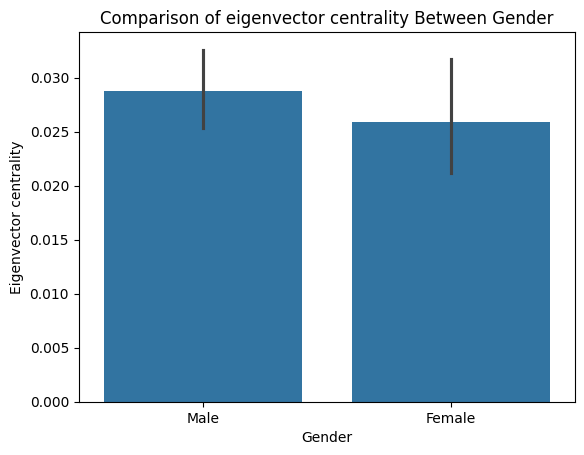

In [21]:
sns.barplot(x="gender", y="eigen_cent", data=attr)
plt.title("Comparison of eigenvector centrality Between Gender")
plt.xlabel("Gender")
plt.ylabel("Eigenvector centrality")
plt.show()

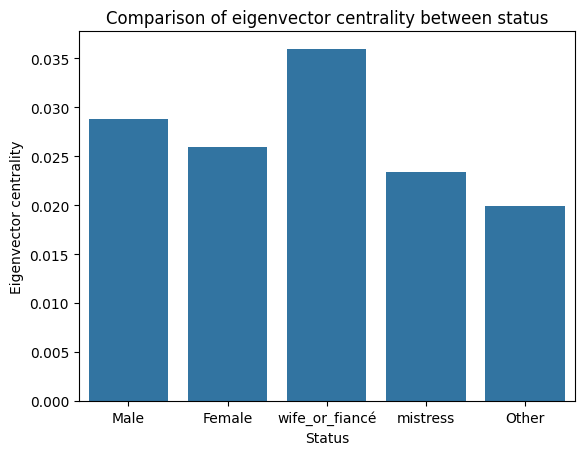

In [22]:
sns.barplot(x="index", y="eigen_cent", data=plot_data)
plt.title("Comparison of eigenvector centrality between status")
plt.xlabel("Status")
plt.ylabel("Eigenvector centrality")
plt.show()

Esetleg még egy husband column -> csak, hogy látszódjon, hogy a Male azért kisebb a wife-oknál, mivel nagyon kevéssé fontos karatker van benne

Izgalmas -> degree centrality-ben mistress = Other -> a mistressek csak azért fontosak, mivel közel állnak a faszijukhoz

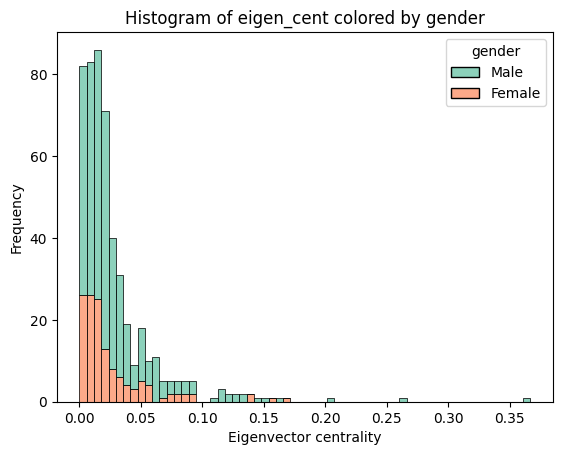

In [23]:
sns.histplot(data=attr, x='eigen_cent', hue='gender', multiple='stack', palette='Set2')
plt.title('Histogram of eigen_cent colored by gender')
plt.xlabel('Eigenvector centrality')
plt.ylabel('Frequency')
plt.show()

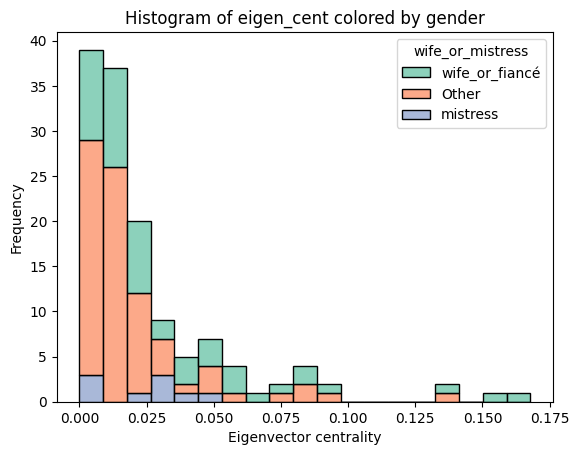

In [24]:
sns.histplot(data=attr, x='eigen_cent', hue='wife_or_mistress', multiple='stack', palette='Set2')
plt.title('Histogram of eigen_cent colored by gender')
plt.xlabel('Eigenvector centrality')
plt.ylabel('Frequency')
plt.show()